In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### (1) 데이터 가져오기

In [2]:
df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

### datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [5]:
# datetime 컬럼을 datetime 형식으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df['dayofweek'] = df['datetime'].dt.dayofweek

### year, month, day, hour, minute, second 데이터 개수 시각화하기

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

Text(0.5, 1.0, 'second')

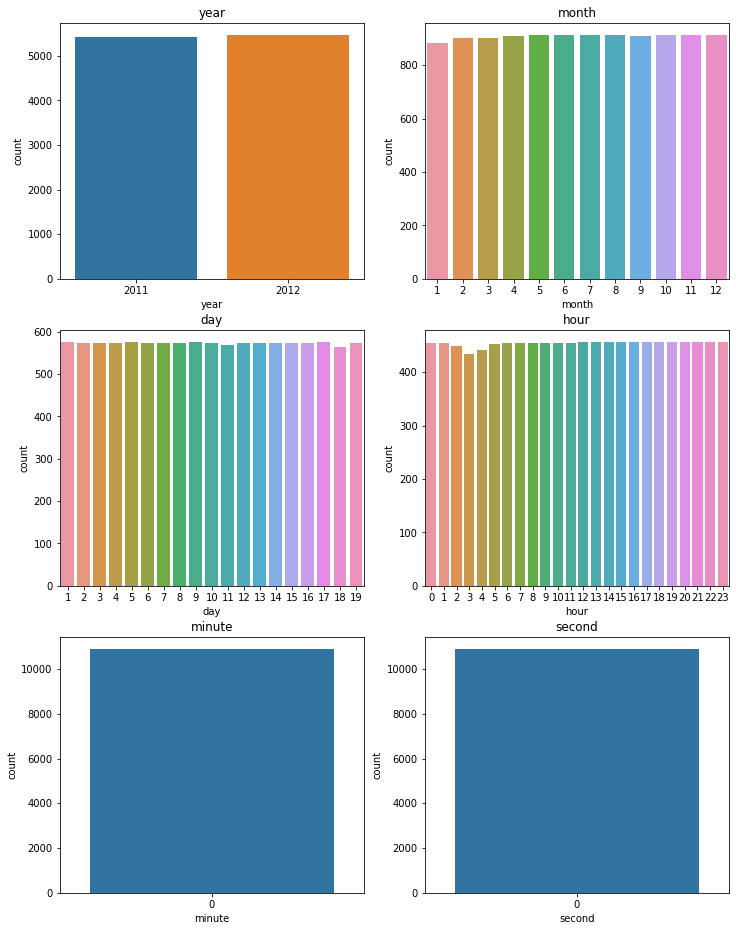

In [12]:
plt.figure(figsize = (12, 16))
plt.subplot(321)
sns.countplot(df['year'])
plt.title('year')

plt.subplot(322)
sns.countplot(df['month'])
plt.title('month')

plt.subplot(323)
sns.countplot(df['day'])
plt.title('day')


plt.subplot(324)
sns.countplot(df['hour'])
plt.title('hour')


plt.subplot(325)
sns.countplot(df['minute'])
plt.title('minute')


plt.subplot(326)
sns.countplot(df['second'])
plt.title('second')


In [14]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [16]:
features = ['temp', 'atemp', 'humidity', 'season', 'weather', 'holiday', 'workingday', 'dayofweek', 'hour']
X = df[features]
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = model.predict(X_test)
predictions

array([-13.65024457, 302.58622913, 337.13670733, ..., 103.01387184,
        35.56019171,  85.01932425])

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5

print(mse, rmse)

22310.021622426506 149.36539633538453


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

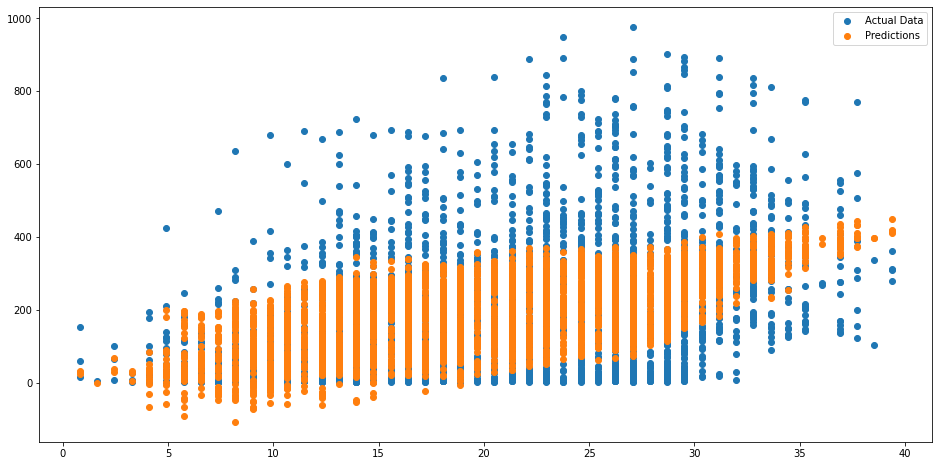

In [24]:
plt.figure(figsize=(16, 8))


plt.scatter(X_test['temp'], y_test, label='Actual Data')


plt.scatter(X_test['temp'], predictions, label='Predictions')


plt.legend()


plt.show()

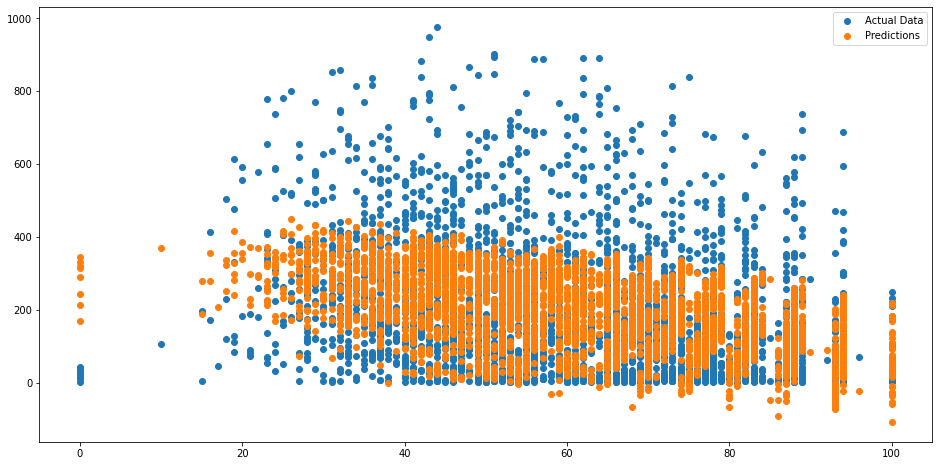

In [25]:
plt.figure(figsize=(16, 8))


plt.scatter(X_test['humidity'], y_test, label='Actual Data')


plt.scatter(X_test['humidity'], predictions, label='Predictions')


plt.legend()


plt.show()

Skewness(왜도): 1.242066
Kurtosis(첨도): 1.300093


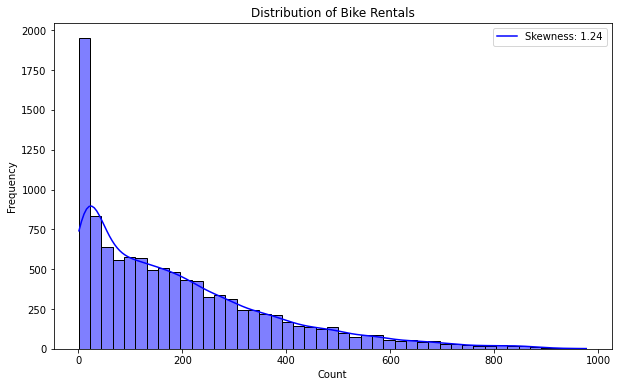

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

graph = sns.histplot(df['count'], kde=True, color='b',
                     ax=ax)
graph.set_title('Distribution of Bike Rentals')
graph.set_xlabel('Count')
graph.set_ylabel('Frequency')

# 왜도와 첨도 출력
skewness = df['count'].skew()
kurtosis = df['count'].kurt()
print('Skewness(왜도): %f' % skewness)
print('Kurtosis(첨도): %f' % kurtosis)

# 왜도 값 레이블 추가
graph.legend(['Skewness: {:.2f}'.format(skewness)], loc='best')

plt.show()